# question 2

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.io as sio
import sklearn
import sklearn.neighbors
import sklearn.datasets
from sklearn import decomposition, manifold

In [22]:
data, label = sklearn.datasets.make_swiss_roll(n_samples=1000, noise=0.0, random_state=None)

In [23]:
data = pd.DataFrame(data)

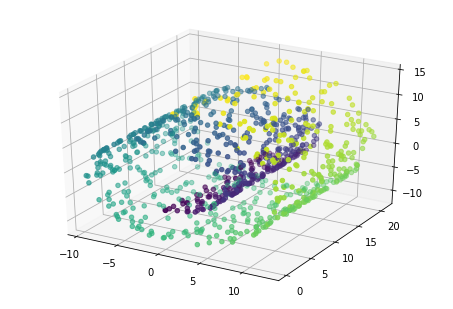

In [24]:
ax = Axes3D(plt.figure())
ax.scatter(data[0],data[1],data[2],c=label)
plt.show()

In [71]:
#question 2.1.1 pca to the data set to 2 parameters
pr_dict ={}
pr_dict['extension']= data
pr_dict['pca'] = pd.DataFrame(decomposition.PCA(n_components=2 ).fit_transform(data))
pr_dict['kpca'] = pd.DataFrame(decomposition.KernelPCA(n_components=2, kernel='rbf',gamma=0.03 ).fit_transform(data))




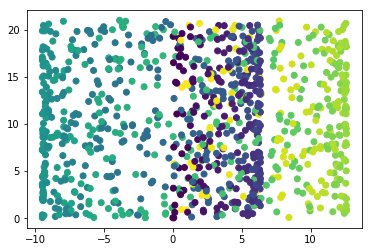

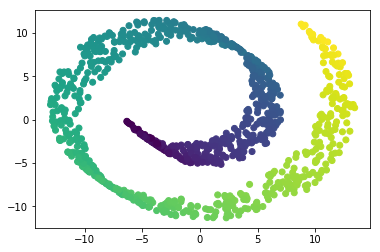

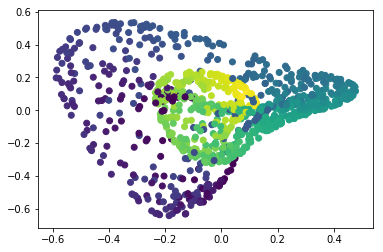

In [72]:
for key in pr_dict.keys():
    plt.scatter(pr_dict[key][0],pr_dict[key][1],c=label)
    plt.show()


we after iterating diferent gamma values $\gamma = \frac{1}{2*\sigma^2}$ we find that $\gamma = 0.03$ represents the data the best

## question 2.1.1
- 3

In [27]:


# The idea is to unfold the data knowing how the data is build 
# 
data2= data.copy()
data2['arctan']= np.arctan(data[0]/data[2])*100
data2['big_zed']= data[1]*100

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_function_transformer.py:161: RuntimeWarning: invalid value encountered in log1p
  **(kw_args if kw_args else {}))


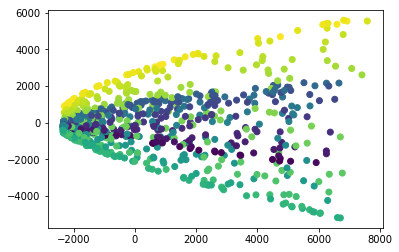

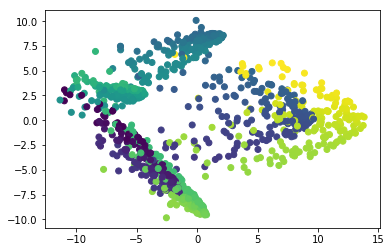

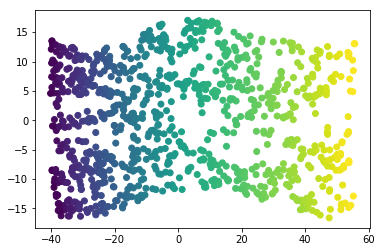

In [80]:
#since we have told we can use any sklearn algohrimt we cheat and use isomap to unfold the data and then maximise the fetures 
# features to a biger dimention to make look the original fetures really small, we could also use some 
# transformation from x in R^n to phi(x) in R^m s.t m>>n 


# polinom try 
poli = data.copy()
# We use a polinom of order 3 which will yield us 20 new features we did include the original ones .... 
pol2 = sklearn.preprocessing.PolynomialFeatures(degree=3).fit_transform(poli)

# We also use a log transformacion over the polinomial (trail and error ) it didn't yield better results 
transformer = sklearn.preprocessing.FunctionTransformer(np.log1p).fit_transform(pol2)

#PCA descomposition of the data after add the fetures 
c= decomposition.PCA(n_components=2 ).fit_transform(pol2).T
d= decomposition.PCA(n_components=2 ).fit_transform((pd.DataFrame(transformer).fillna(0).values)).T
plt.scatter(c[0],c[1],c=label)
plt.show()
plt.scatter(d[0],d[1],c=label)
plt.show()

#we also cheat with the ideas and did a Isomo unfold of the data set and then run a pca
# by doing this we found the best results
a= data.copy()
cheat_iso = manifold.Isomap(n_components=3,n_neighbors=7).fit_transform(data)
a[3]=cheat_iso.T[0]
a[4]=cheat_iso.T[1]
a[5]=cheat_iso.T[2]
b= decomposition.PCA(n_components=2 ).fit_transform(a).T
plt.scatter(b[0],b[1],c=label)
plt.show()

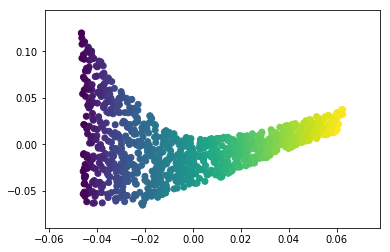

In [86]:
#Question 2.1.2
# LLE and Isomap

lle= manifold.LocallyLinearEmbedding(n_components=2,n_neighbors=12).fit_transform(data).T
plt.scatter(lle[0],lle[1],c=label)
plt.show()

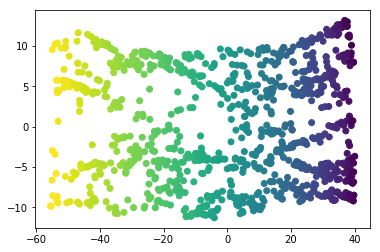

In [140]:
iso = manifold.Isomap(n_components=2,n_neighbors=7).fit_transform(data).T
plt.scatter(iso[0],iso[1],c=label)
plt.show()

### Question 2.1.3 - 1
- We will write a funtion that choose to randon points  

In [144]:
# section 1 - choose two nearest neighbors- 
def find_distances(data, data_reduce):
    nbrs= sklearn.neighbors.NearestNeighbors(n_neighbors= 2).fit(data_reduce)
    distances, labels = nbrs.kneighbors(data_reduce)
    index = pd.DataFrame(labels).sample(n=1)
    two_points_original = data.loc[index.values[0],:]
    two_points_PR = data_reduce.loc[index.values[0],:]
    
    orinal_dist = np.linalg.norm(two_points_original)
    PR_dist = np.linalg.norm(two_points_PR)
    print(f'The original distance is {orinal_dist}, the distance in the paramer reduction is {PR_dist}')


find_distances(data, pr_dict['pca'])   
find_distances(data,pr_dict['kpca'])
find_distances(data,pd.DataFrame(iso))
find_distances(data,pd.DataFrame(lle))


The original distance is 17.474476574496602, the distance in the paramer reduction is 6.838599200858406
The original distance is 16.051277736070606, the distance in the paramer reduction is 0.3852163456364559
The original distance is 19.049876945276218, the distance in the paramer reduction is 904.695052103637
The original distance is 19.049876945276218, the distance in the paramer reduction is 1.4142135623730954


In [185]:
# section 2 - choose two points that are not in each other's 40'th nearest neighbors-
def find_distance_40(data, data_reduce):
    nbrs= sklearn.neighbors.NearestNeighbors(n_neighbors= 50).fit(data)
    distances, labels = nbrs.kneighbors(data)
    pd.DataFrame(labels).head()
    tmp=pd.DataFrame(labels)
    while(True):
        pair = np.reshape(tmp.sample(n=1).values,-1)
        pair = [pair[0],pair[-1]]
        if pair[0] not in tmp.loc[pair[1],:]:
            break 
    two_points_original = data.loc[pair,:]
    two_points_PR = data_reduce.loc[pair,:]
    orinal_dist = np.linalg.norm(two_points_original)
    PR_dist = np.linalg.norm(two_points_PR)
    print(f'The original distance is {orinal_dist}, the distance in the paramer reduction is {PR_dist}')
    

In [186]:
find_distance_40(data, pr_dict['pca'])   
find_distance_40(data,pr_dict['kpca'])
find_distance_40(data,pd.DataFrame(iso).T)
find_distance_40(data,pd.DataFrame(lle).T)

The original distance is 26.89725697817415, the distance in the paramer reduction is 13.854297906791496
The original distance is 26.341049612758237, the distance in the paramer reduction is 0.46690995107538824
The original distance is 23.401132835478908, the distance in the paramer reduction is 9.370920522436933
The original distance is 22.688180731787874, the distance in the paramer reduction is 0.058460639638735906


In [188]:
# section 3 - choose two points that are not in each other's 40'th nearest neighbors-


In [247]:
def find_12(data, data_reduce):
    nbrs_high= sklearn.neighbors.NearestNeighbors(n_neighbors= 12).fit(data)
    nbrs_low= sklearn.neighbors.NearestNeighbors(n_neighbors= 12).fit(data_reduce)
    distances_high, labels_high = nbrs_high.kneighbors(data)
    distances_low, labels_low = nbrs_low.kneighbors(data_reduce)
    c=[]
    for dataIdx in data.index:
        high=labels_high[dataIdx,:]
        low=labels_low[dataIdx,:]
        k_nn_not_12=np.intersect1d(high,low)
        # assumed that the meaning was to exclude from the 12NN in low-dimension, those who was also included in high-dimension-
        low=np.delete(low,k_nn_not_12)
        c.append(data_reduce.loc[low,:])
        # assuming that the meaning of |c(i)| == number of data points in the group c(i)
    print(f' mean of all c = {np.mean(([len(x) for x in c]))}')
    return c
#displaying mean value of c-
c=dict()
c['pca']=find_12(data, pr_dict['pca']) 
c['kpca']=find_12(data,pr_dict['kpca'])
c['iso']=find_12(data,pd.DataFrame(iso).T)
c['lle']=find_12(data,pd.DataFrame(lle).T)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  if sys.path[0] == '':


 mean of all c = 11.932
 mean of all c = 11.919
 mean of all c = 11.868
 mean of all c = 11.894


In [248]:
c['pca'][1]

,0,1
1,6.089413,-0.290111
217,6.032871,-0.422469
110,6.026926,0.013161
174,6.204559,-0.600751
307,5.771354,-0.543405
277,6.508459,-0.307017
738,5.753014,-0.029477
355,6.586841,-0.483160
313,6.595420,-0.645194
684,5.527891,0.000555


In [249]:
# section 3 - calculate the mean MDS measure of distances -
def mean_MDS(data,data_reduce):
    """nbrs_high= sklearn.neighbors.NearestNeighbors(n_neighbors= 12).fit(data)
    nbrs_low= sklearn.neighbors.NearestNeighbors(n_neighbors= 12).fit(data_reduce)
    distances_high, labels_high = nbrs_high.kneighbors(data)
    distances_low, labels_low = nbrs_low.kneighbors(data_reduce)
    c=[]"""
    c=find_12(data, data_reduce) 
    mds=[] 
    for num, c_i in enumerate(c):
        x_i=data.loc[num,:]
        y_i=data_reduce.loc[num,:]
        sum_i=0
        for dataIdx in c_i.index:
            x=data.loc[dataIdx,:]
            y=data_reduce.loc[dataIdx,:]
            high_dist = np.linalg.norm([x,x_i])
            low_dist = np.linalg.norm([y,y_i])
            inner_argument=np.square(high_dist-low_dist)
            sum_i=sum_i+inner_argument
        mds.append(sum_i/len(c_i))
    print(f' mean of all mds = {np.mean(mds)}')
    return mds

#displaying mean value of mds-
mds=dict()
mds['pca']= mean_MDS(data, pr_dict['pca']) 
mds['kpca']=mean_MDS(data,pr_dict['kpca'])
mds['iso']= mean_MDS(data,pd.DataFrame(iso).T)
mds['lle']= mean_MDS(data,pd.DataFrame(lle).T)

#for point=3 for example-


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  if sys.path[0] == '':


 mean of all c = 11.932
 mean of all mds = 99.62268990832743
 mean of all c = 11.919
 mean of all mds = 463.54759875216615
 mean of all c = 11.868
 mean of all mds = 588.8159938802361
 mean of all c = 11.894
 mean of all mds = 474.4356139044346


19.283203402178042

In [233]:

nbrs= sklearn.neighbors.NearestNeighbors(n_neighbors= 50).fit(data)
distances, labels = nbrs.kneighbors(data)
pd.DataFrame(labels).head()
tmp=pd.DataFrame(labels)
while(True):
    pair = np.reshape(tmp.sample(n=1).values,-1)
    pair = [pair[0],pair[-1]]
    if pair[0] not in tmp.loc[pair[1],:]:
        break 


In [88]:

def all_two(data):
    pr_dict ={}
    pr_dict['extension']= data
    pr_dict['pca'] = pd.DataFrame(decomposition.PCA(n_components=2 ).fit_transform(data))
    pr_dict['kpca'] = pd.DataFrame(decomposition.KernelPCA(n_components=2, kernel='rbf',gamma=0.03 ).fit_transform(data))
    for key in pr_dict.keys():
        plt.scatter(pr_dict[key][0],pr_dict[key][1],c=label)
        plt.show()

    data2= data.copy()
    data2['arctan']= np.arctan(data[0]/data[2])*100
    data2['big_zed']= data[1]*100

    plt.scatter(data2['arctan'],data2['big_zed'],c=label)
    plt.show()

    # polinom try 
    poli = data.copy()
    pol2 = sklearn.preprocessing.PolynomialFeatures(degree=3).fit_transform(poli)
    transformer = sklearn.preprocessing.FunctionTransformer(np.log1p).fit_transform(pol2)
    c= decomposition.PCA(n_components=2 ).fit_transform(pol2).T
    d= decomposition.PCA(n_components=2 ).fit_transform((pd.DataFrame(transformer).fillna(0).values)).T
    plt.scatter(c[0],c[1],c=label)
    plt.show()
    plt.scatter(d[0],d[1],c=label)
    plt.show()

    cheat_iso = manifold.Isomap(n_components=2,n_neighbors=7).fit_transform(data)
    a= data.copy()
    cheat_iso = manifold.Isomap(n_components=2,n_neighbors=7).fit_transform(data)
    a[3]=cheat_iso.T[0]
    a[4]=cheat_iso.T[1]
    b= decomposition.PCA(n_components=2 ).fit_transform(a).T
    plt.scatter(b[0],b[1],c=label)
    plt.show()
    lle= manifold.LocallyLinearEmbedding(n_components=2,n_neighbors=7).fit_transform(data).T
    plt.scatter(lle[0],lle[1],c=label)
    plt.show()
    cheat_iso = manifold.Isomap(n_components=2,n_neighbors=7).fit_transform(data).T
    plt.scatter(cheat_iso[0],cheat_iso[1],c=label)
    plt.show()
